In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.fftpack import fftn, fftshift, ifftn, ifftshift, fft2, ifft2
from skimage import restoration

%matplotlib inline

# Question 1

In [8]:
khayyam_img = cv2.imread("Khayyam.jpg")
psf_input = cv2.imread("psf1.bmp")

k_b, k_g, K_r = cv2.split(khayyam_img)
psf_b, psf_g, psf_r = cv2.split(psf_input)

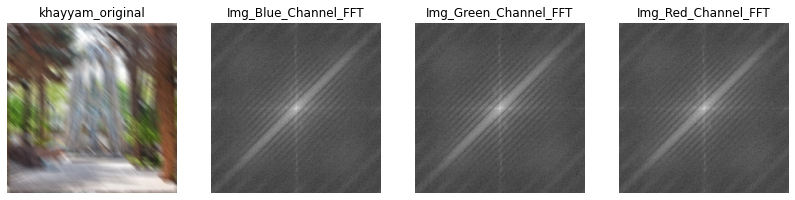

In [418]:
hky_fftn = fftn(khayyam_img)
psf_fftn = fftn(psf_input)

plt.figure(figsize=(14,16))

plt.subplot(141)
plt.imshow(cv2.cvtColor(khayyam_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('khayyam_original')

plt.subplot(142)
plt.imshow(np.abs(np.log(fftshift(fft2(k_b)))), 'gray')
plt.axis('off')
plt.title('Img_Blue_Channel_FFT')

plt.subplot(143)
plt.imshow(np.abs(np.log(fftshift(fft2(k_g)))), 'gray')
plt.axis('off')
plt.title('Img_Green_Channel_FFT')

plt.subplot(144)
plt.imshow(np.abs(np.log(fftshift(fft2(K_r)))), 'gray')
plt.axis('off')
plt.title('Img_Red_Channel_FFT')

plt.show()


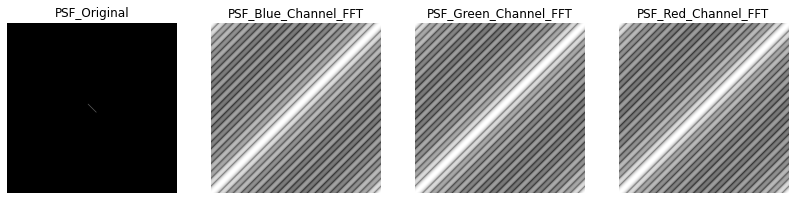

In [419]:
plt.figure(figsize=(14,16))

plt.subplot(141)
plt.imshow(cv2.cvtColor(psf_input, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('PSF_Original')

plt.subplot(142)
plt.imshow(np.abs(np.log(fft2(ifftshift(psf_b)))), 'gray')
plt.axis('off')
plt.title('PSF_Blue_Channel_FFT')

plt.subplot(143)
plt.imshow(np.abs(np.log(fft2(ifftshift(psf_g)))), 'gray')
plt.axis('off')
plt.title('PSF_Green_Channel_FFT')

plt.subplot(144)
plt.imshow(np.abs(np.log(fft2(ifftshift(psf_r)))), 'gray')
plt.axis('off')
plt.title('PSF_Red_Channel_FFT')

plt.show()

In [9]:
def wiener_lpf(img, psf, k):
    
    k_b, k_g, k_r = cv2.split(khayyam_img)
    psf_b, psf_g, psf_r = cv2.split(psf_input)


    k_b_fft = fft2(np.float32(k_b) / 255)
    k_g_fft = np.fft.fft2(np.float32(k_g) / 255)
    k_r_fft = np.fft.fft2(np.float32(k_r) / 255)

    psf_b_fft = fft2(ifftshift(psf_b))
    psf_g_fft = np.fft.fft2(ifftshift(psf_g))
    psf_r_fft = np.fft.fft2(ifftshift(psf_r))

    psf_b_fft = psf_b_fft / psf_b_fft.max()
    psf_g_fft = psf_g_fft / psf_g_fft.max()
    psf_r_fft = psf_r_fft / psf_r_fft.max()

    H_b = np.conj(psf_b_fft)/(psf_b_fft**2 + k)
    H_b = H_b/H_b.max()
    H_g = np.conj(psf_g_fft)/(psf_g_fft**2 + k)
    H_g = H_g/H_g.max()
    H_r = np.conj(psf_r_fft)/(psf_r_fft**2 + k)
    H_r = H_r/H_r.max()

    inv_f_hat_b = np.uint8(np.abs(ifft2(H_b*k_b_fft))*255)
    inv_f_hat_g = np.uint8(np.abs(ifft2(H_g*k_g_fft))*255)
    inv_f_hat_r = np.uint8(np.abs(ifft2(H_r*k_r_fft))*255)

    res_img = cv2.merge((inv_f_hat_b, inv_f_hat_g, inv_f_hat_r))
    return res_img


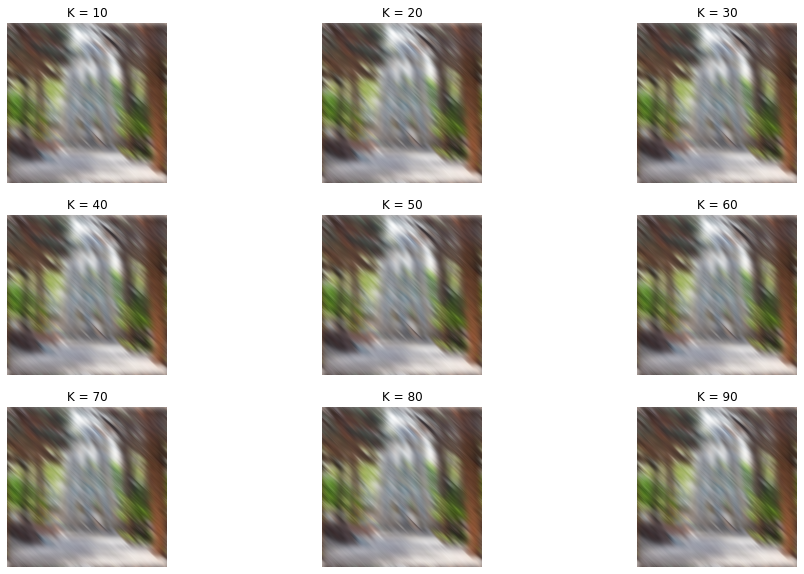

In [13]:
modified_img = np.copy(khayyam_img)
plt.figure(figsize=(16,10))

for i,k in enumerate(range(10,100,10)):
    restored_img = wiener_lpf(modified_img, psf_input, k)
    plt.subplot(3,3,i+1)
    plt.imshow(cv2.cvtColor(restored_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('K = '+ str(k))

plt.show()

In [2]:
car = cv2.imread('car.jpg')

car_b, car_g, car_r = cv2.split(car)

car_b_fft = fft2(car_b)
car_g_fft = fft2(car_g)
car_r_fft = fft2(car_r

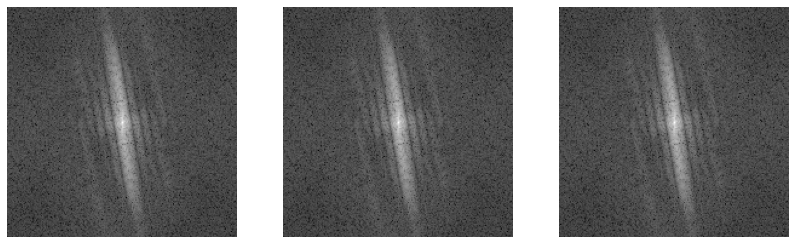

In [6]:
plt.figure(figsize=(14,8))

plt.subplot(131)
plt.imshow(np.log(np.abs(fftshift(car_b_fft))), 'gray')
plt.axis('off')

plt.subplot(132)
plt.imshow(np.log(np.abs(fftshift(car_g_fft))), 'gray')
plt.axis('off')

plt.subplot(133)
plt.imshow(np.log(np.abs(fftshift(car_r_fft))), 'gray')
plt.axis('off')

plt.show()

# Question 2

In [1]:
import numpy as np
import cv2

In [2]:
def sobel(img, thresh1=80, thresh2=80):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    soble_V = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
    soble_H = np.copy(soble_V.T)
    
    res = cv2.filter2D(cv2.filter2D(img,-1, soble_H), -1, soble_V)
    
    res[res < thresh1] = 0
    res[res >= thresh2] = 255
    
    return res

# الف

In [7]:
cam_id = 0 

cap = cv2.VideoCapture(0)

while True:
    ret, I = cap.read()
    
#     T = sobel(I)
    T = 255 - I
    cv2.imshow("My Camera", T)
    
    if cv2.waitKey(1) & 0xFF == ord('e'):
        break
        
cap.release()
cv2.destroyAllWindows()

# ب

In [3]:
cam_id = 0 

cap = cv2.VideoCapture(0)

while True:
    ret, I = cap.read()
    
    T = cv2.Canny(I, 120, 60)
    cv2.imshow("My Camera", T)
    
    if cv2.waitKey(1) & 0xFF == ord('e'):
        break
        
cap.release()
cv2.destroyAllWindows()

# Question 3

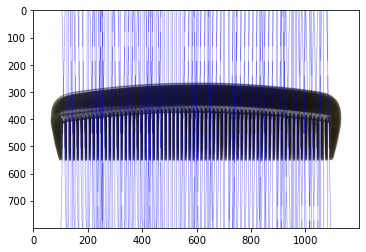

In [140]:
comb = cv2.imread('comb.jpg')
comb_gray = cv2.cvtColor(comb, cv2.COLOR_BGR2GRAY)

soble_V = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
soble_H = np.copy(soble_V.T)

def dirction(img):
    g_x = cv2.filter2D(edges,-1, soble_H)
    g_y = cv2.filter2D(edges,-1, soble_V)
    
    return np.arctan2(g_y, g_x)

dirc = dirction(comb_gray)

edges = cv2.Canny(comb_gray, 50, 200)

lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

# convert each line to coordinates back in the original image
for line in lines:
    for rho, theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        
        deg = dirc[np.int(np.floor(y0)), np.abs(np.int(x0))]
        
        
        if (np.abs(np.cos(theta - deg)) > 0.99):

            x1 = int(x0 + 1000 * -b)
            y1 = int(y0 + 1000 * a)
            x2 = int(x0 - 1000 * -b)
            y2 = int(y0 - 1000 * a)

#         # draw each line on the image
            cv2.line(comb, (x1, y1), (x2, y2), (0, 0, 255), 1)
plt.imshow(comb)

# ۳ ب

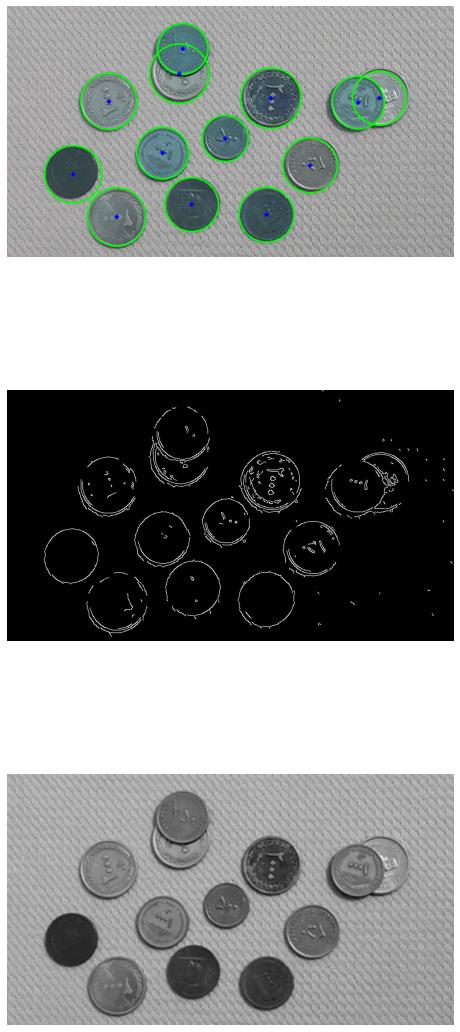

the number of the Images are:  13


In [401]:
img = cv2.imread("coin.jpg")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

b_output2 = cv2.GaussianBlur(gray_image, (5, 5), 1)
c_output2 = cv2.Canny(b_output2, 120, 190)

circles = cv2.HoughCircles(c_output2,cv2.HOUGH_GRADIENT,1,30,
                           param1=180,param2=25,minRadius=20,maxRadius=60)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)

plt.figure(figsize=(8,20))

plt.subplot(311)
plt.imshow(img, 'gray')
plt.axis('off')
   
plt.subplot(312)
plt.imshow(c_output2, 'gray')
plt.axis('off')

plt.subplot(313)
plt.imshow(b_output2, 'gray')
plt.axis('off')

plt.show()

print("the number of the Images are: ", str(len(circles[0])))